# Activation Functions

In the most general sense, an activation function is a function that takes in something and return something, but that doesn't help us much.

From machine learning perspective, an activation function is to be applied to either at the **hidden layer** or at the **output layer**, to obtain *certain* desirable properties. 

We now look at a few such function and see what properties do they have and which layer (either hidden or output) it is more applicable.

## contraints

Grokking discussed a few constraints on the function:

* continuous and infinite domain
* monotonic (e.g. a quadratic won't work)
* non-linear: a linear such as a straight line is no good; non-linear brings in **selective correlation** into learning.
* efficient: both activiation function and its derivative should be easy to compute 

## raw output value

let's get this one out of the way: if your desired predication output (like stock price), then you probably don't need an activation function.


## relu function

This function can be written as:

\begin{equation}
f(x) = 
\begin{cases}
0 & \quad x<0 \\
x & \quad x>0
\end{cases}
\end{equation}

The graph of this function can be drawn as:

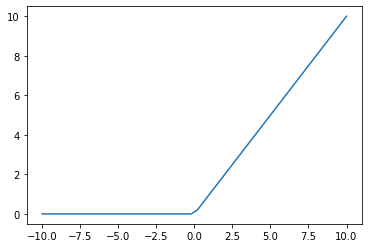

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

def relu(x):
    return (x > 0) * x

x = np.linspace(-10,10, num=50)
y = relu(x)

fig, ax = plt.subplots()
ax.plot(x, y)


relu is **usually** used in hidden layer.

## sigmoid function

$$f(x) = \frac{1}{1 + e^{-x}}$$

sigmod smooth input into 0 and 1. This allow you to interpret the output as probability.
It can be used in both **hidden layer** and **output layer**.

**sigmoid sensitivity** changes based on input: when inputs becomes very positive or very negative, sigmoid makes only small changes to the incoming weights; The rationale is, if you already learned, you should not drastically changes your weights at that point. The "stickness" is a desirable property as it guards against occasional errorous training examples.


The following code display its graph form.


Text(1, 0.55, '0.5')

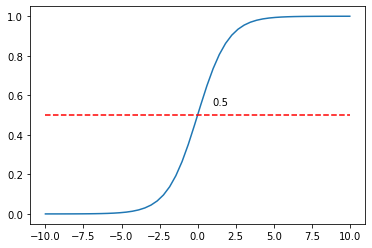

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-10, 10, num=50)
plt.plot(x, sigmoid(x))
plt.plot(x, [0.5]*len(x),'--r') # dashed red
plt.text(1, 0.55, "0.5")

## tanh function

numpy has builtin `tanh()` function. So



Text(1, 0.1, '1.0')

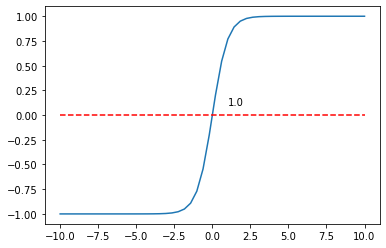

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10, 10, num=50)
plt.plot(x, np.tanh(x))
plt.plot(x, [0]*len(x),'--r') # dashed red
plt.text(1, 0.1, "1.0")

As can be seen, tanh is similar to sigmod, but its range is between (-1, 1).
The negative value is not much useful to output layer, but in many problems, it is better than sigmod for **hidden layers**

## softmax function (against sigmoid)

softmax is often considered better activaition function for **output** layer than sigmoid. Grokking explains this pretty well (page 168, 169). 

the rationale is, the higher the nework predict one value, the lower it predicts other values. So if you prediction proposition is something like "which one of the output is the BEST", then softmax fits the bill. The sum of softmax is 1. sigmoid doesn't have this property.




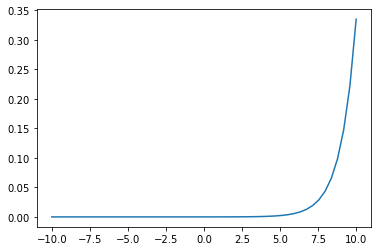

In [2]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

x = np.linspace(-10, 10, num=50)
plt.plot(x, softmax(x))
#plt.plot(x, [0.5]*len(x),'--r') # dashed red
#plt.text(1, 0.55, "0.5")

## Revisit layer delta

This wasn't explained well, and missing examples.
This section explores further.


First let's prep some data


In [119]:
import numpy as np 
np.random.seed(1)

weights_0_1 = 2 * np.random.random((3,4)) - 1
weights_1_2 = 2 * np.random.random((4,1)) - 1

inputs = np.array([
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
    [1, 1, 1]
])

target = np.array([[1, 1, 0, 0]]).T 


# inputs = np.array([
#     [9, 5, 4],
#     [4, 8, 3],
#     [4, 7, 5],
#     [7, 3, 4]
# ])

# target = np.array([[8, 5, 4, 7]]).T 

alpha = 0.2

def relu(x):
    return (x>0)*x

def relu2deriv(x):
    return x > 0

def train_all():
    global weights_0_1, weights_1_2
    layer2_error = 0
    for i in range(len(inputs)):
        layer0 = inputs[i:i+1]
        layer1 = relu(np.dot(layer0, weights_0_1))
        layer2 = np.dot(layer1, weights_1_2)
        
        layer2_error += np.sum((layer2 - target[i:i+1])**2) 
        layer2_delta = (layer2 - target[i:i+1])

        weight_delta_1_2 = layer1.T.dot(layer2_delta)

        layer1_delta = layer2_delta.dot(weights_1_2.T) * relu2deriv(layer1)
        weight_delta_0_1 = layer0.T.dot(layer1_delta)

        weights_1_2 -= alpha * weight_delta_1_2
        weights_0_1 -= alpha * weight_delta_0_1
    
    return layer2_error

for it in range(60):
    layer2_error = train_all()
    if (it %10 == 9):
        print(f"Error: {layer2_error}")


Error: 0.6342311598444467
Error: 0.35838407676317513
Error: 0.0830183113303298
Error: 0.006467054957103705
Error: 0.0003292669000750734
Error: 1.5055622665134859e-05



For the first trainning example, our target value is 9, layer2 output is 17.74, and layer2_delta = 9.14, **layer_delta** in general, represents how much higher or lower you want a node's value to be for perfect prediction on the training example**


**weight_delta** on the other hand, is **estimate** of the direction and amount to move the weight to reduce **layer_delta**. **weight_delta** is inferred by derivative.


layer2_delta is a single value, how to derive 3 weight_delta in this case? we multiply weight_input by layer_delta.

we use the pattern:

```
weight_delta = weight_input * layer_delta
```


